In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

In [ ]:
data = pd.read_csv("/content/pbl_data.csv")

In [ ]:
data

,Unnamed: 0,gender,age,hypertension,heart_disease,bmi,blood_glucose_level,thyroid,diabetes
0,0,F,80.0,Yes,No,25.19,140,Yes,Yes
1,1,F,54.0,Yes,Yes,27.32,80,Yes,Yes
2,2,M,28.0,Yes,Yes,27.32,158,Yes,Yes
3,3,F,36.0,Yes,Yes,23.45,155,Yes,Yes
4,4,M,76.0,No,No,20.14,155,No,Yes
...,...,...,...,...,...,...,...,...,...
99995,99995,F,80.0,Yes,Yes,27.32,90,Yes,Yes
99996,99996,F,2.0,Yes,Yes,17.37,100,Yes,Yes
99997,99997,M,66.0,Yes,Yes,27.83,155,Yes,Yes
99998,99998,F,24.0,Yes,Yes,35.42,100,Yes,Yes


In [ ]:
data1 = data.drop(['Unnamed: 0'], axis = 1)
data1

,gender,age,hypertension,heart_disease,bmi,blood_glucose_level,thyroid,diabetes
0,F,80.0,Yes,No,25.19,140,Yes,Yes
1,F,54.0,Yes,Yes,27.32,80,Yes,Yes
2,M,28.0,Yes,Yes,27.32,158,Yes,Yes
3,F,36.0,Yes,Yes,23.45,155,Yes,Yes
4,M,76.0,No,No,20.14,155,No,Yes
...,...,...,...,...,...,...,...,...
99995,F,80.0,Yes,Yes,27.32,90,Yes,Yes
99996,F,2.0,Yes,Yes,17.37,100,Yes,Yes
99997,M,66.0,Yes,Yes,27.83,155,Yes,Yes
99998,F,24.0,Yes,Yes,35.42,100,Yes,Yes


In [ ]:
data1['gender'] = data1['gender'].map({'F': 0, 'M': 1})

In [ ]:
data1['hypertension'] = data1['hypertension'].map({'Yes': 0, 'No': 1})

In [ ]:
data1['heart_disease'] = data1['heart_disease'].map({'Yes': 0, 'No': 1})

In [ ]:
data1['diabetes'] = data1['diabetes'].map({'Yes': 0, 'No': 1})

In [ ]:
data1['thyroid'] = data1['thyroid'].map({'Yes': 0, 'No': 1})

In [ ]:
data1.isnull().sum()

gender                   18
age                       0
hypertension              0
heart_disease             0
bmi                       0
blood_glucose_level       0
thyroid                2316
diabetes                  0
dtype: int64

In [ ]:
#y['TSH'].fillna((y['TSH'].mean()), inplace=True)
data1['gender'].fillna((data1['gender'].mean()), inplace=True)
data1['thyroid'].fillna((data1['thyroid'].mean()), inplace=True)


In [ ]:
data1

,gender,age,hypertension,heart_disease,bmi,blood_glucose_level,thyroid,diabetes
0,0.0,80.0,0,1,25.19,140,0.0,0
1,0.0,54.0,0,0,27.32,80,0.0,0
2,1.0,28.0,0,0,27.32,158,0.0,0
3,0.0,36.0,0,0,23.45,155,0.0,0
4,1.0,76.0,1,1,20.14,155,1.0,0
...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,27.32,90,0.0,0
99996,0.0,2.0,0,0,17.37,100,0.0,0
99997,1.0,66.0,0,0,27.83,155,0.0,0
99998,0.0,24.0,0,0,35.42,100,0.0,0


In [ ]:
data1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
blood_glucose_level    0
thyroid                0
diabetes               0
dtype: int64

In [ ]:
X = data1.drop(['diabetes'], axis=1)
X

,gender,age,hypertension,heart_disease,bmi,blood_glucose_level,thyroid
0,0.0,80.0,0,1,25.19,140,0.0
1,0.0,54.0,0,0,27.32,80,0.0
2,1.0,28.0,0,0,27.32,158,0.0
3,0.0,36.0,0,0,23.45,155,0.0
4,1.0,76.0,1,1,20.14,155,1.0
...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,27.32,90,0.0
99996,0.0,2.0,0,0,17.37,100,0.0
99997,1.0,66.0,0,0,27.83,155,0.0
99998,0.0,24.0,0,0,35.42,100,0.0


In [ ]:
y = data1['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train Feedforward Neural Network
fnn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
fnn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [ ]:
# Predict using FNN
y_pred_fnn = fnn.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_fnn)
print("Accuracy of the hybrid model:", accuracy)

Accuracy of the hybrid model: 0.94745


In [ ]:
# Generate classification reports for both models
report_fnn = classification_report(y_test, y_pred_fnn)
print("Classification Report - Feedforward Neural Network:\n", report_fnn)

Classification Report - Feedforward Neural Network:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       0.93      0.42      0.58      1708

    accuracy                           0.95     20000
   macro avg       0.94      0.71      0.77     20000
weighted avg       0.95      0.95      0.94     20000



In [ ]:
# Train XGBoost
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1, gamma=0, subsample=0.8,
                    colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [ ]:
# Predict using XGBoost
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of the hybrid model:", accuracy)

Accuracy of the hybrid model: 0.94795


In [ ]:
# Generate classification reports for both models
#report_fnn = classification_report(y_test, y_pred_fnn)
report_xgb = classification_report(y_test, y_pred_xgb)

#print("Classification Report - Feedforward Neural Network:\n", report_fnn)
print("Classification Report - XGBoost:\n", report_xgb)


Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       0.97      0.41      0.57      1708

    accuracy                           0.95     20000
   macro avg       0.96      0.70      0.77     20000
weighted avg       0.95      0.95      0.94     20000



In [ ]:
# Ensemble Prediction
y_pred_combined = np.round((y_pred_fnn + y_pred_xgb) / 2).astype(int)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_combined)
print("Accuracy of the hybrid model:", accuracy)

Accuracy of the hybrid model: 0.94765


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_combined)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       0.97      0.40      0.57      1708

    accuracy                           0.95     20000
   macro avg       0.96      0.70      0.77     20000
weighted avg       0.95      0.95      0.94     20000



In [ ]:
# Hyperparameter Tuning: Grid Search for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [ ]:
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Stacking ensemble
estimators = [('fnn', fnn), ('xgb', xgb)]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
stacked_model.fit(X_train, y_train)

StackingClassifier(estimators=[('fnn',
                                MLPClassifier(hidden_layer_sizes=(100, 50),
                                              max_iter=500, random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              nthread=4, num_parallel_tree=None, ...))],
                   final_estimator=RandomForestClassifier())

In [ ]:
# Predict using stacked ensemble
y_pred_stacked = stacked_model.predict(X_test)

In [ ]:
# Generate classification report for stacked ensemble
report_stacked = classification_report(y_test, y_pred_stacked)
print("Classification Report - Stacked Ensemble:\n", report_stacked)

Classification Report - Stacked Ensemble:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.76      0.44      0.56      1708

    accuracy                           0.94     20000
   macro avg       0.86      0.71      0.76     20000
weighted avg       0.93      0.94      0.93     20000



In [ ]:
# Cross-validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(stacked_model, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", scores.mean())

Cross-Validation Scores: 0.9429599999999999


In [ ]:
# Feature Importance
importance = xgb.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("Feature Importance:", feature_importance)

Feature Importance: blood_glucose_level    0.513195
age                    0.177341
hypertension           0.111342
heart_disease          0.093370
bmi                    0.077535
gender                 0.021829
thyroid                0.005388
dtype: float32


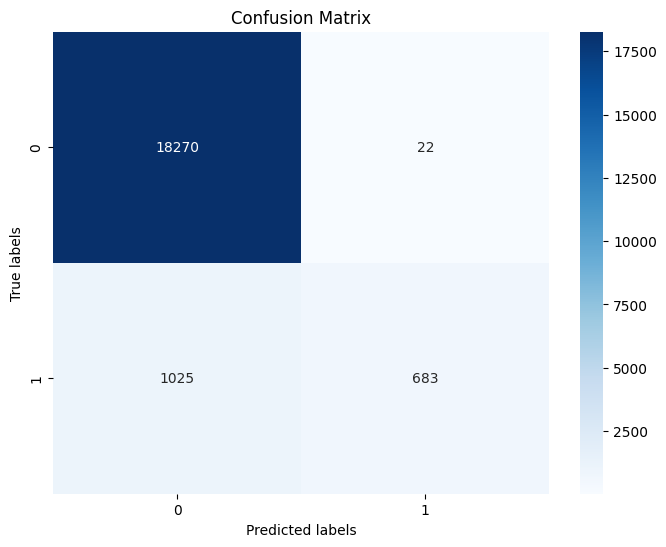

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


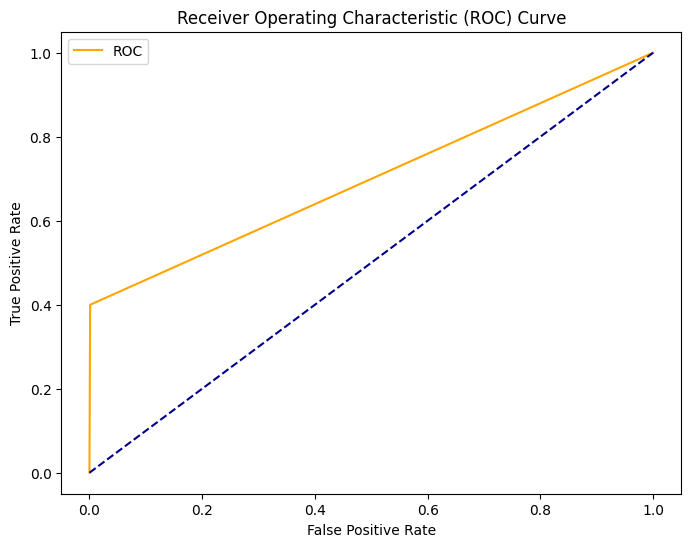

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_combined)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()